<a href="https://colab.research.google.com/github/Toan02Ky-UIT/CodeProject/blob/main/model_resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
github_list = '''https://github.com/GwLewis369/Hand-written-digit-classification-data.git
https://github.com/gbaonr/CS114_handwritten_digits_data
https://github.com/adamwhite625/CS114_hand_written_digit.git
https://github.com/theRaven1312/CS114.P21
https://github.com/Khoiisme1905/CS114.git
https://github.com/ProjectHT1/machinelearning
https://github.com/Searching96/hand-written-digit.git
https://github.com/Salmon1605/CS114
https://github.com/anhtuann1224/hand_written_digit
https://github.com/NATuanAN/Hand_written_digit_classification_data.git
https://github.com/huapogba/may-hoc
https://github.com/hieutran890j2/CS114.git
https://github.com/votanhoang483/CS114.P21-Hand_written_digit_classification
https://github.com/DHPh/CS114_hand_written_digit/
https://github.com/thaituanUIT/ReminiScenceAI
https://github.com/anngyn/CS114-Hand-Written-Digit
https://github.com/lngphgthao/cs114-hand-written-digit-classification/tree/main/hand_written_digit
https://github.com/Toan02Ky-UIT/CS114
https://github.com/Lochke/CS114_Handwritten_Digit_Classification.git
https://github.com/NThong325/CS114/tree/cfd654a14dd471f5272387139d586ddcbf9cdf7e/hand_written_digit
https://github.com/toanlamdata/digit-recognition-group
https://github.com/Nohenshin/CS114.P21-2025-
https://github.com/hmcslearning/ML1142025
https://github.com/lngphgthao/cs114-hand-written-digit-classification
https://github.com/huapogba/may-hoc
https://github.com/NThong325/CS114/tree/main/hand_written_digit
https://github.com/23520276/Hand-written-digit-classification/
https://github.com/NThong325/CS114
'''



In [ ]:
from google.colab import drive
drive.mount('/gdrive')
data_dir = '/gdrive/MyDrive/Project/Bai5/Github'

Mounted at /gdrive


In [ ]:
%cd $data_dir
!git config --global core.compression 0
!rm -rf $data_dir/*
for i in github_list.split():
  # !echo $i
  # !git clone $i
  dir_name = !echo "$i" | sed -E 's|https://github.com/([^/]+)/([^/]+)(\.git)?|\1_\2|'
  dir_name = dir_name[0]
  # print(dir_name[0])
  !git clone $i /tmp/$dir_name || rm -rf /tmp/$dir_name
  !mv /tmp/$dir_name $data_dir/$dir_name
  # !echo $dir_name
  # !git clone $i

/gdrive/MyDrive/Project/Bai5/Github
Cloning into '/tmp/GwLewis369_Hand-written-digit-classification-data.git'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 397 (delta 5), reused 103 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (397/397), 23.05 MiB | 28.96 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Cloning into '/tmp/gbaonr_CS114_handwritten_digits_data'...
remote: Enumerating objects: 837, done.
remote: Counting objects: 100% (837/837), done.
remote: Compressing objects: 100% (822/822), done.
remote: Total 837 (delta 14), reused 721 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (837/837), 27.23 MiB | 36.50 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Cloning into '/tmp/adamwhite625_CS114_hand_written_digit.git'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (342/3

In [ ]:
!ls */hand_written_digit/??52????/


23520276_Hand-written-digit-classification/hand_written_digit/23520276/:
0_10.jpg  1_3.jpg   2_6.jpg   3_9.jpg	5_2.jpg   6_5.jpg   7_8.jpg   9_1.jpg
0_1.jpg   1_4.jpg   2_7.jpg   4_10.jpg	5_3.jpg   6_6.jpg   7_9.jpg   9_2.jpg
0_2.jpg   1_5.jpg   2_8.jpg   4_1.jpg	5_4.jpg   6_7.jpg   8_10.jpg  9_3.jpg
0_3.jpg   1_6.jpg   2_9.jpg   4_2.jpg	5_5.jpg   6_8.jpg   8_1.jpg   9_4.jpg
0_4.jpg   1_7.jpg   3_10.jpg  4_3.jpg	5_6.jpg   6_9.jpg   8_2.jpg   9_5.jpg
0_5.jpg   1_8.jpg   3_1.jpg   4_4.jpg	5_7.jpg   7_10.jpg  8_3.jpg   9_6.jpg
0_6.jpg   1_9.jpg   3_2.jpg   4_5.jpg	5_8.jpg   7_1.jpg   8_4.jpg   9_7.jpg
0_7.jpg   2_10.jpg  3_3.jpg   4_6.jpg	5_9.jpg   7_2.jpg   8_5.jpg   9_8.jpg
0_8.jpg   2_1.jpg   3_4.jpg   4_7.jpg	6_10.jpg  7_3.jpg   8_6.jpg   9_9.jpg
0_9.jpg   2_2.jpg   3_5.jpg   4_8.jpg	6_1.jpg   7_4.jpg   8_7.jpg
1_10.jpg  2_3.jpg   3_6.jpg   4_9.jpg	6_2.jpg   7_5.jpg   8_8.jpg
1_1.jpg   2_4.jpg   3_7.jpg   5_10.jpg	6_3.jpg   7_6.jpg   8_9.jpg
1_2.jpg   2_5.jpg   3_8.jpg   5_1.jpg	6_4.j

In [ ]:
!ls $data_dir | wc -l
print(len(github_list.split()))

22
28


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()

In [ ]:
data_dir = '/gdrive/MyDrive/Project/Bai5/Github'

In [ ]:
import os
import glob

a = glob.glob(f'{data_dir}/*/hand_written_digit/??52????')
print(a)
image_lists = []
for folder in a:
  for num in range(10):
    t = glob.glob(f'{folder}/{num}_*')
    image_lists += t

['/gdrive/MyDrive/Project/Bai5/Github/GwLewis369_Hand-written-digit-classification-data.git/hand_written_digit/22520369', '/gdrive/MyDrive/Project/Bai5/Github/GwLewis369_Hand-written-digit-classification-data.git/hand_written_digit/23521387', '/gdrive/MyDrive/Project/Bai5/Github/GwLewis369_Hand-written-digit-classification-data.git/hand_written_digit/23521419', '/gdrive/MyDrive/Project/Bai5/Github/gbaonr_CS114_handwritten_digits_data/hand_written_digit/22520068', '/gdrive/MyDrive/Project/Bai5/Github/gbaonr_CS114_handwritten_digits_data/hand_written_digit/22520069', '/gdrive/MyDrive/Project/Bai5/Github/gbaonr_CS114_handwritten_digits_data/hand_written_digit/22520109', '/gdrive/MyDrive/Project/Bai5/Github/adamwhite625_CS114_hand_written_digit.git/hand_written_digit/23520550', '/gdrive/MyDrive/Project/Bai5/Github/adamwhite625_CS114_hand_written_digit.git/hand_written_digit/23520667', '/gdrive/MyDrive/Project/Bai5/Github/adamwhite625_CS114_hand_written_digit.git/hand_written_digit/23521481

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Tạo thư mục train và val
base_dataset_path = '/gdrive/MyDrive/Project/Bai5/dataset'
train_path = os.path.join(base_dataset_path, 'train')
val_path = os.path.join(base_dataset_path, 'val')

for p in [train_path, val_path]:
    for i in range(10):
        os.makedirs(os.path.join(p, str(i)), exist_ok=True)

# Chia tập train/val
train_imgs, val_imgs = train_test_split(image_lists, test_size=0.2, random_state=42)

# Hàm copy ảnh vào thư mục theo label
def move_images(image_paths, target_dir):
    for img_path in image_paths:
        label = os.path.basename(img_path).split('_')[0]
        dest = os.path.join(target_dir, label, os.path.basename(img_path))
        try:
            shutil.copy(img_path, dest)
        except Exception as e:
            print(f"Lỗi: {img_path} => {e}")

# Thực hiện di chuyển ảnh
move_images(train_imgs, train_path)
move_images(val_imgs, val_path)

print(f"Tổng số ảnh train: {len(train_imgs)}")
print(f"Tổng số ảnh val: {len(val_imgs)}")


Tổng số ảnh train: 4919
Tổng số ảnh val: 1230


In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(base_dataset_path, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                              shuffle=True, num_workers=2)
               for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print("Classes:", class_names)


Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


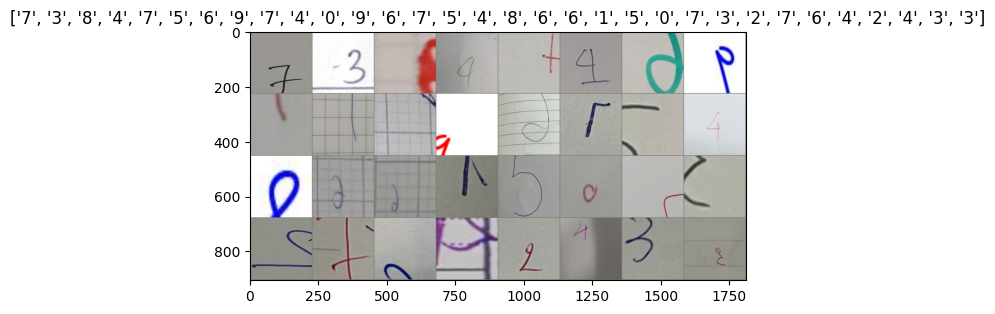

In [ ]:
def imshow(inp, title=None):
    """Hiển thị ảnh tensor"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Hiển thị 1 batch đầu
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 20)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Lưu mô hình tốt nhất
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)


Epoch 1/10
--------------------
train Loss: 1.8959 Acc: 0.3395
val Loss: 1.0873 Acc: 0.6604
Epoch 2/10
--------------------
train Loss: 1.1891 Acc: 0.6263
val Loss: 0.6579 Acc: 0.8204
Epoch 3/10
--------------------
train Loss: 0.9535 Acc: 0.6995
val Loss: 0.4899 Acc: 0.8533
Epoch 4/10
--------------------
train Loss: 0.8407 Acc: 0.7298
val Loss: 0.4414 Acc: 0.8756
Epoch 5/10
--------------------
train Loss: 0.7557 Acc: 0.7567
val Loss: 0.3485 Acc: 0.9040
Epoch 6/10
--------------------
train Loss: 0.7251 Acc: 0.7587
val Loss: 0.3274 Acc: 0.9004
Epoch 7/10
--------------------
train Loss: 0.6841 Acc: 0.7742
val Loss: 0.3006 Acc: 0.9129
Epoch 8/10
--------------------
train Loss: 0.6437 Acc: 0.7867
val Loss: 0.2836 Acc: 0.9129
Epoch 9/10
--------------------
train Loss: 0.6352 Acc: 0.7934
val Loss: 0.2686 Acc: 0.9227
Epoch 10/10
--------------------
train Loss: 0.6119 Acc: 0.7952
val Loss: 0.2647 Acc: 0.9244

Training complete in 196m 36s
Best val Acc: 0.9244


In [ ]:
torch.save(model_ft.state_dict(), '/gdrive/MyDrive/Project/Bai5/model_digit.pth')


In [ ]:
test_dir = '/gdrive/MyDrive/Project/Bai5/data.2025'


In [ ]:
from torchvision import transforms

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # mean
                         [0.229, 0.224, 0.225])  # std
])


In [ ]:
# load lại mô hình:
model_path = '/gdrive/MyDrive/Project/Bai5/model_digit.pth'

model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)  # 10 lớp cho chữ số 0–9
model_ft.load_state_dict(torch.load(model_path, map_location=device))
model_ft = model_ft.to(device)
model_ft.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import csv
import os
import glob
from PIL import Image, UnidentifiedImageError
from tqdm import tqdm
import torch
from torchvision import transforms

data_2025_path = '/gdrive/MyDrive/Project/Bai5/data.2025'

output_csv = '/gdrive/MyDrive/Project/Bai5/predictions.csv'

image_paths = glob.glob(os.path.join(data_2025_path, '*.png')) + \
              glob.glob(os.path.join(data_2025_path, '*.jpg')) + \
              glob.glob(os.path.join(data_2025_path, '*.jpeg'))

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

from torchvision import models
import torch.nn as nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_path = '/gdrive/MyDrive/Project/Bai5/model_digit.pth'

model_ft = models.resnet18(weights=None)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)
model_ft.load_state_dict(torch.load(model_path, map_location=device))
model_ft = model_ft.to(device)
model_ft.eval()

with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for img_path in tqdm(image_paths):
        try:
            img = Image.open(img_path).convert('RGB')
        except UnidentifiedImageError:
            continue  # Bỏ qua nếu lỗi ảnh

        img_tensor = data_transforms(img).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model_ft(img_tensor)
            _, preds = torch.max(outputs, 1)

        filename = os.path.basename(img_path)
        writer.writerow([filename, preds.item()])


100%|██████████| 9448/9448 [25:08<00:00,  6.26it/s]
